In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 5 # to fix size of plot
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'/home/thais/Documents/code/learning'

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")
len(movies)

559

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ["Film", "Genre", "CriticRating", "AudienceRating", "BudgetMillions", "Year"]
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


# category data type

In [9]:
# movies["Film"]
movies.Film = movies.Film.astype("category")

In [10]:
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [11]:
# acessing unique categories
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [12]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


# joint plot

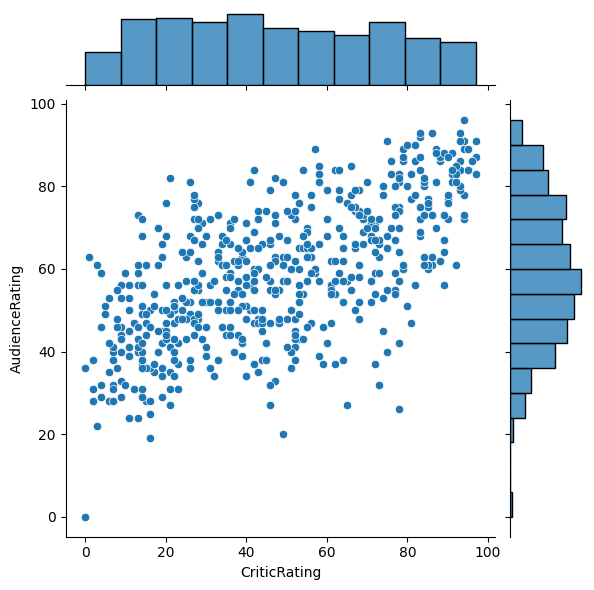

In [13]:
j1 = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating")

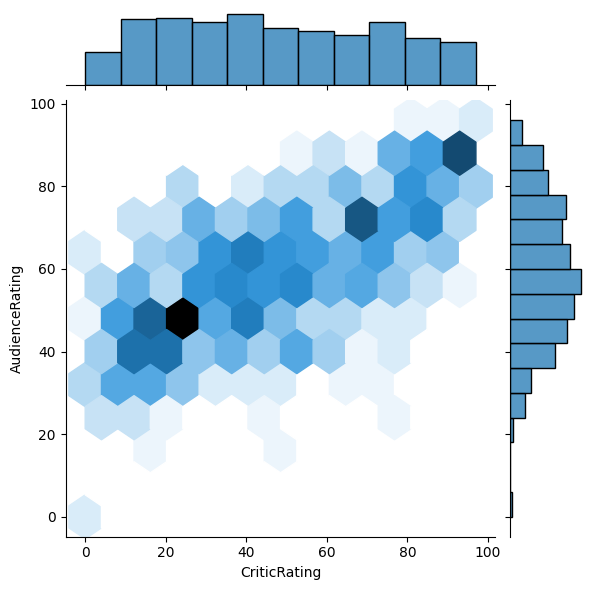

In [14]:
j1 = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", kind="hex")

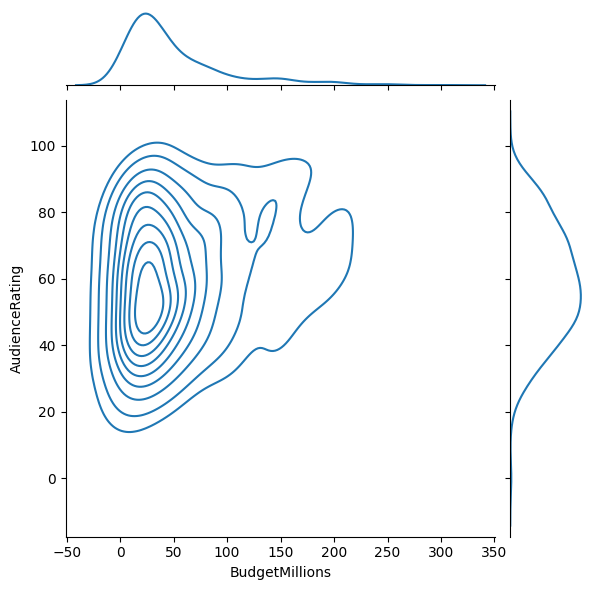

In [15]:
j2 = sns.jointplot(data=movies, x="BudgetMillions", y="AudienceRating", kind="kde")

------

# histograms

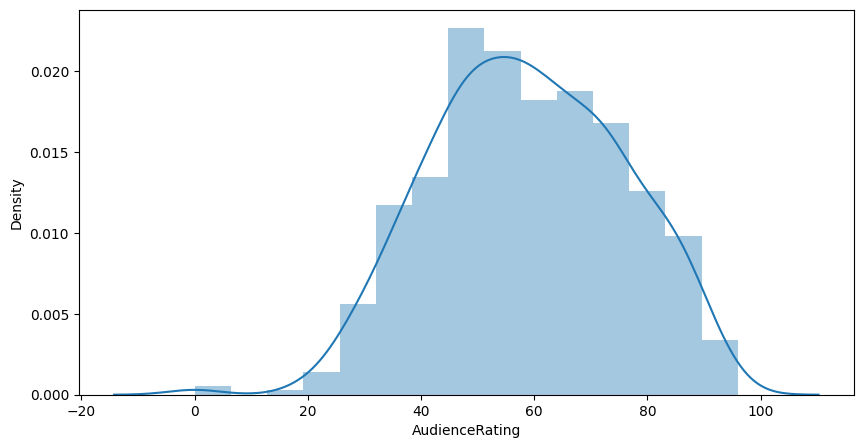

In [17]:
# histograms with seaborn edit
d1 = sns.distplot(movies.AudienceRating, bins=15)

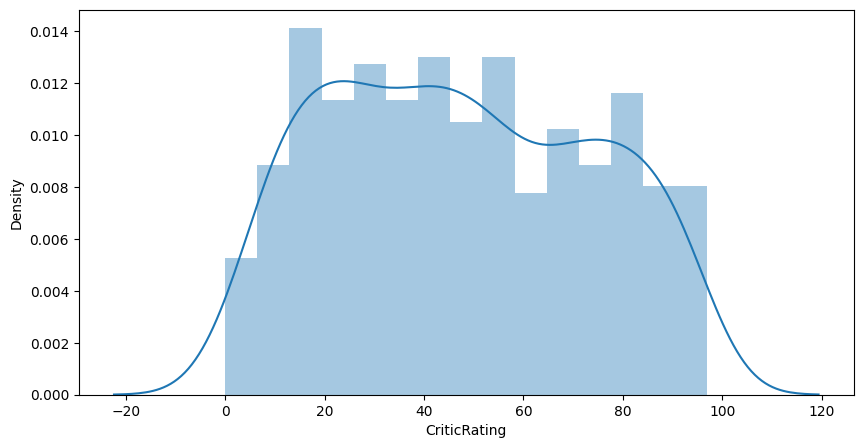

In [18]:
d2 = sns.distplot(movies.CriticRating, bins=15)

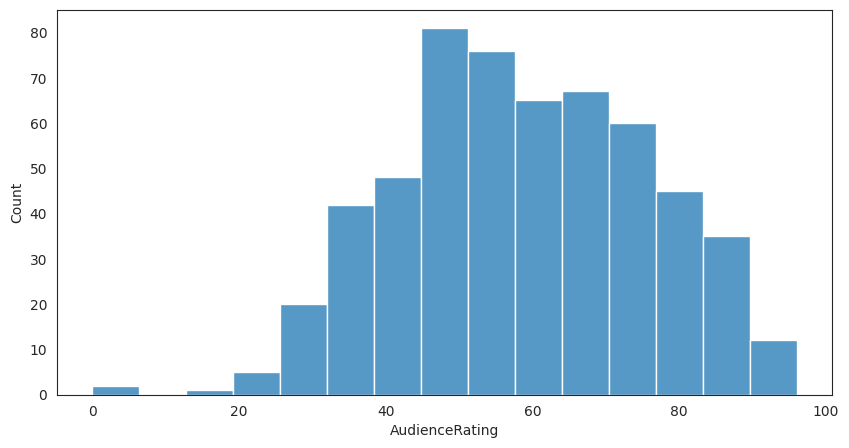

In [19]:
sns.set_style("white")
# more emotional type of behavior / rating / normal intuition are usually normally distributed
h1 = sns.histplot(movies.AudienceRating, bins=15)

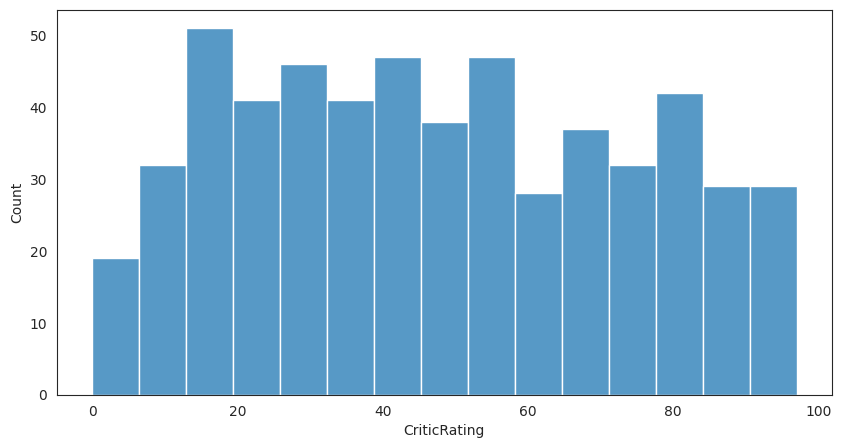

In [20]:
# rules behind rating
h2 = sns.histplot(movies.CriticRating, bins=15)

-----

# stacked histograms

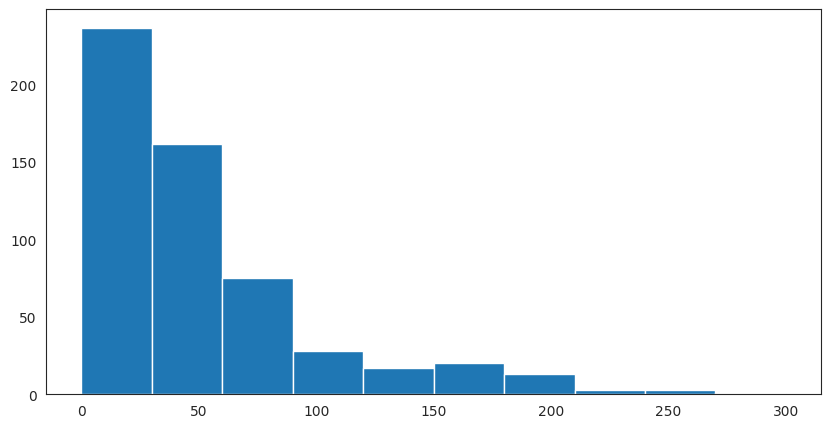

In [21]:
# pyplot histograms
plt.hist(movies.BudgetMillions)
plt.show()

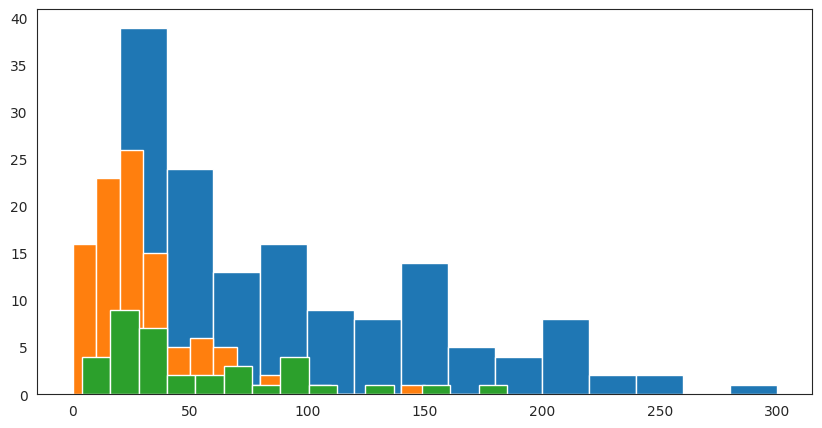

In [22]:
plt.hist(movies[movies.Genre == "Action"].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == "Thriller"].BudgetMillions, bins=15)
plt.show()

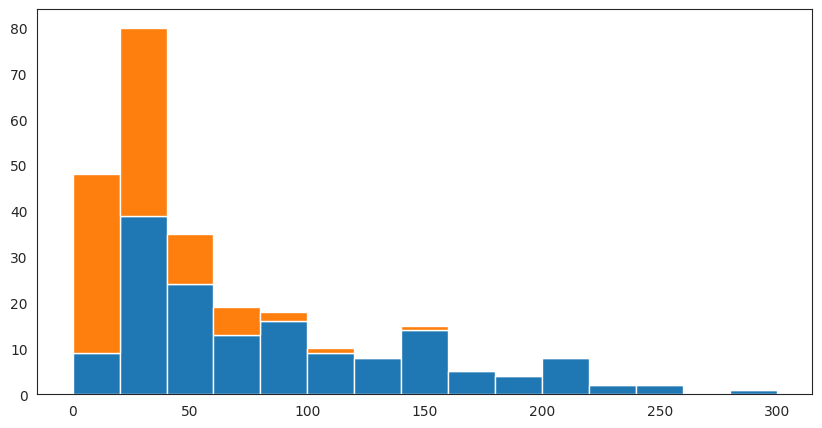

In [23]:
h3 = plt.hist([movies[movies.Genre == "Action"].BudgetMillions, movies[movies.Genre == "Drama"].BudgetMillions], bins=15, stacked=True)
plt.show()

In [24]:
glist = []
labels = []

for g in movies.Genre.cat.categories:
    glist.append(movies[movies.Genre == g].BudgetMillions)
    labels.append(g)
    

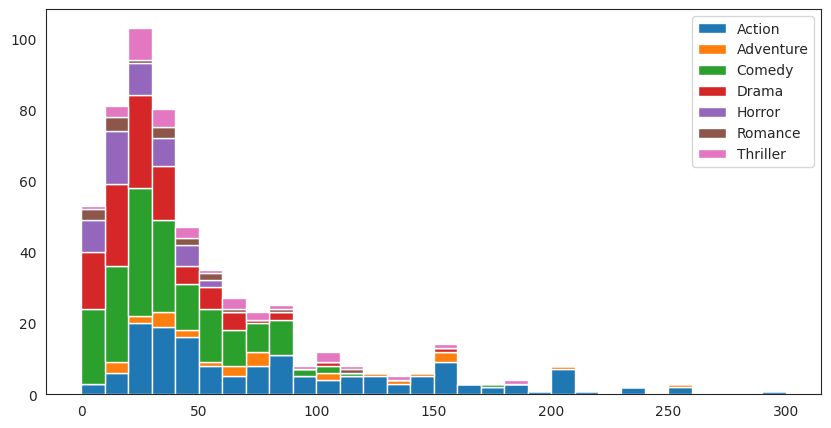

In [25]:
h4 = plt.hist(glist, bins=30, stacked=True, label=labels)
plt.legend()
plt.show()

# KDE plot

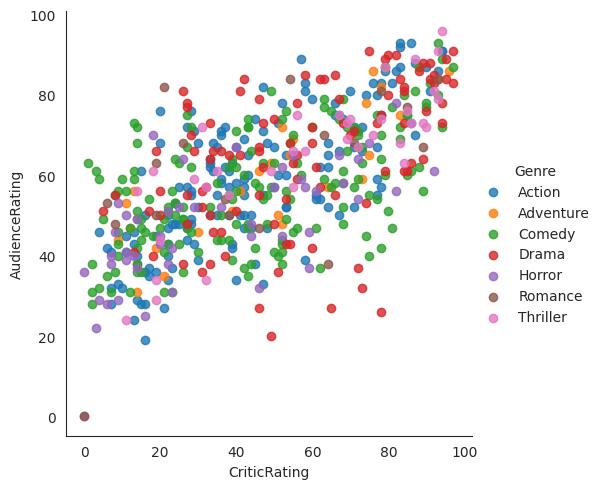

In [26]:
kde1 = sns.lmplot(data=movies, x="CriticRating", y="AudienceRating", fit_reg=False, hue="Genre", height=5, aspect=1)

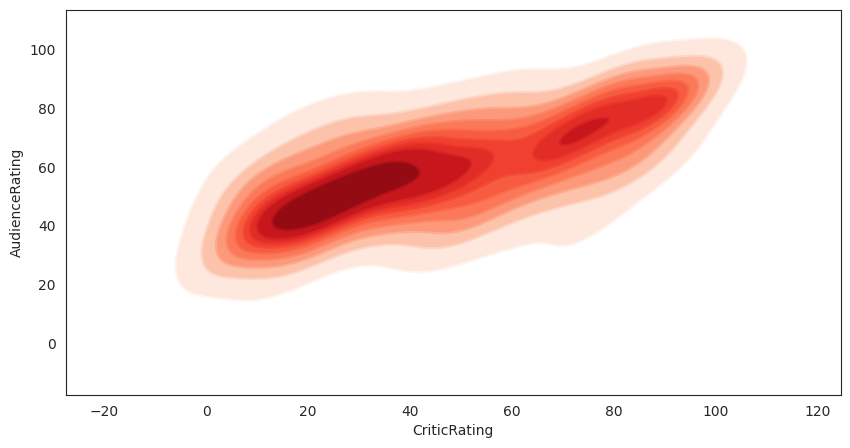

In [27]:
# plot looks kinda smudged
kde2 = sns.kdeplot(data=movies, x="CriticRating", y="AudienceRating", shade=True, shade_lowest=False, cmap="Reds")
# TIP: running this plot together keeps the outline around the edges
kde3 = sns.kdeplot(data=movies, x="CriticRating", y="AudienceRating", cmap="Reds")

--------

# subplots

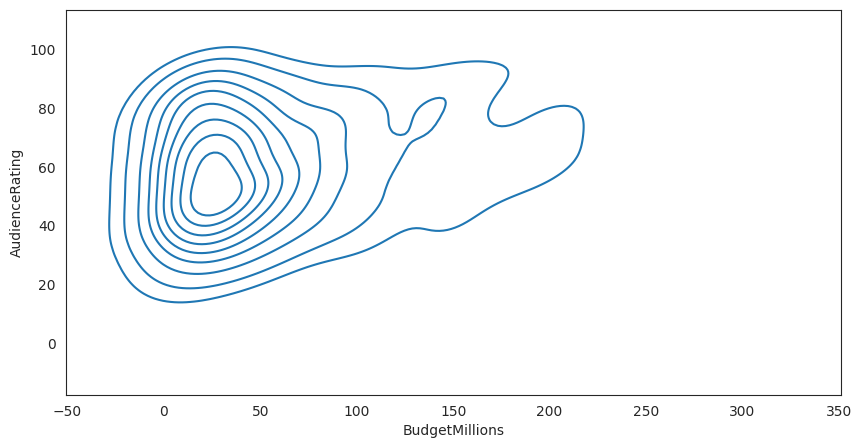

In [28]:
sp1 = sns.kdeplot(data=movies, x="BudgetMillions", y="AudienceRating")

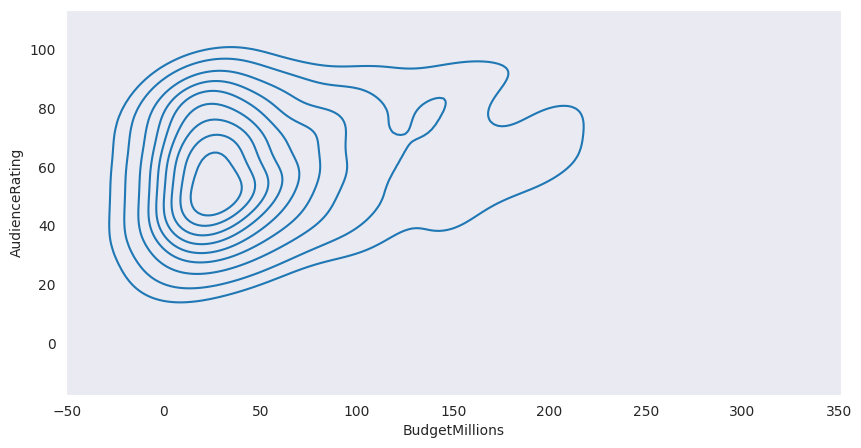

In [29]:
sns.set_style("dark")
sp1 = sns.kdeplot(data=movies, x="BudgetMillions", y="AudienceRating")

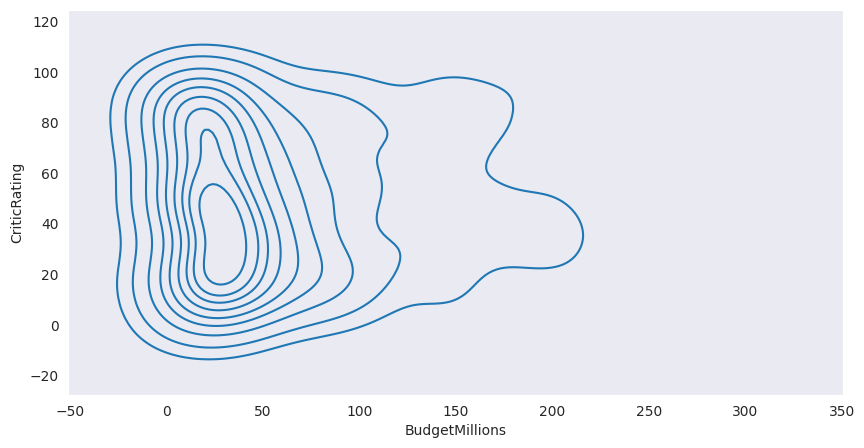

In [30]:
sp2 = sns.kdeplot(data=movies, x="BudgetMillions", y="CriticRating")

[(-40.0, 230.0)]

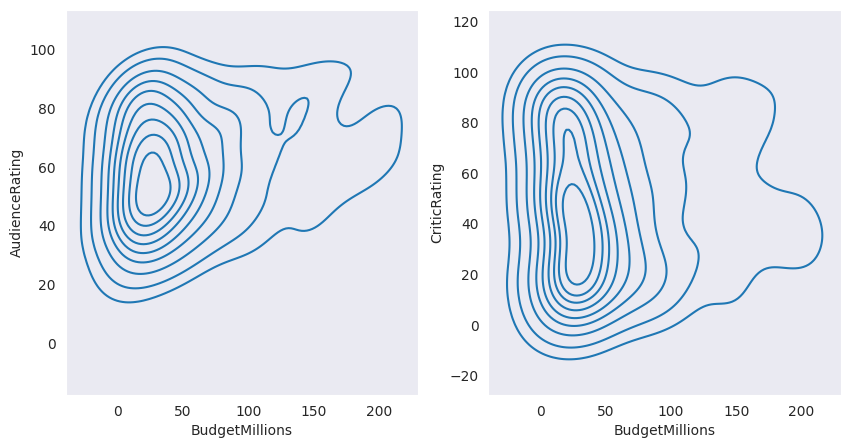

In [31]:
# 1 line, 2 columns
f, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True)
sp1 = sns.kdeplot(data=movies, x="BudgetMillions", y="AudienceRating", ax=axes[0])
sp2 = sns.kdeplot(data=movies, x="BudgetMillions", y="CriticRating", ax=axes[1])
sp1.set(xlim=(-40,230))

# violinplots

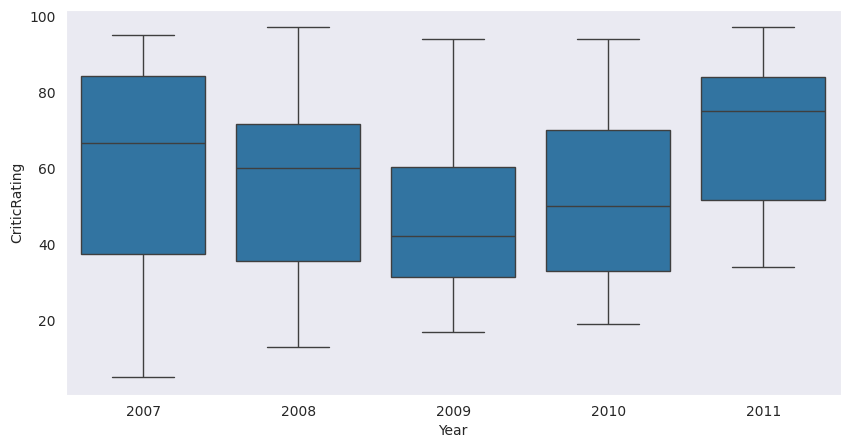

In [33]:
# to analyse quartiles
# b1 = sns.boxplot(data=movies, x="Genre", y="CriticRating")
b1 = sns.boxplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

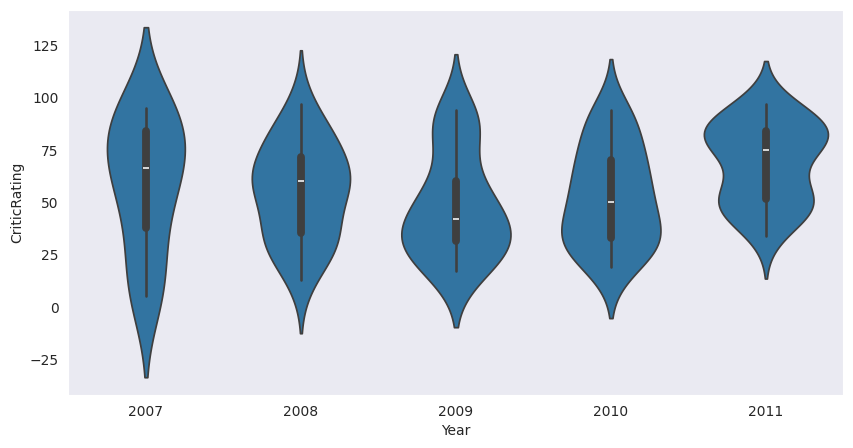

In [34]:
# a more visual display of amount of points at each rating / density / simetrical concentrations
# v1 = sns.violinplot(data=movies, x="Genre", y="CriticRating")
v1 = sns.violinplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

# facet grids

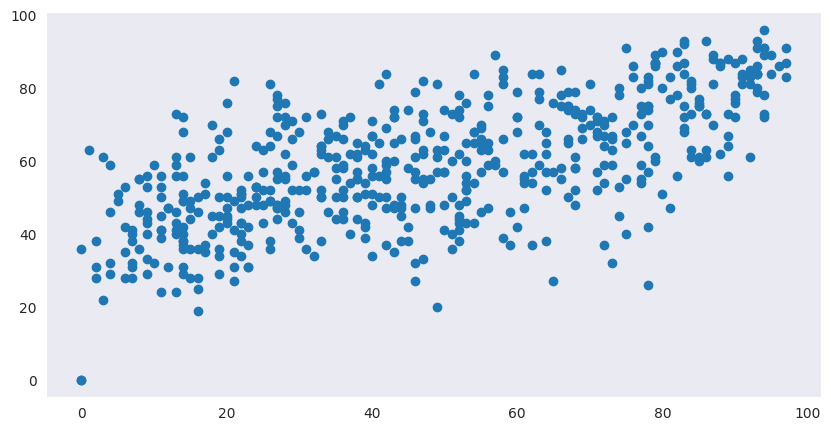

In [35]:
plt.scatter(movies.CriticRating, movies.AudienceRating)

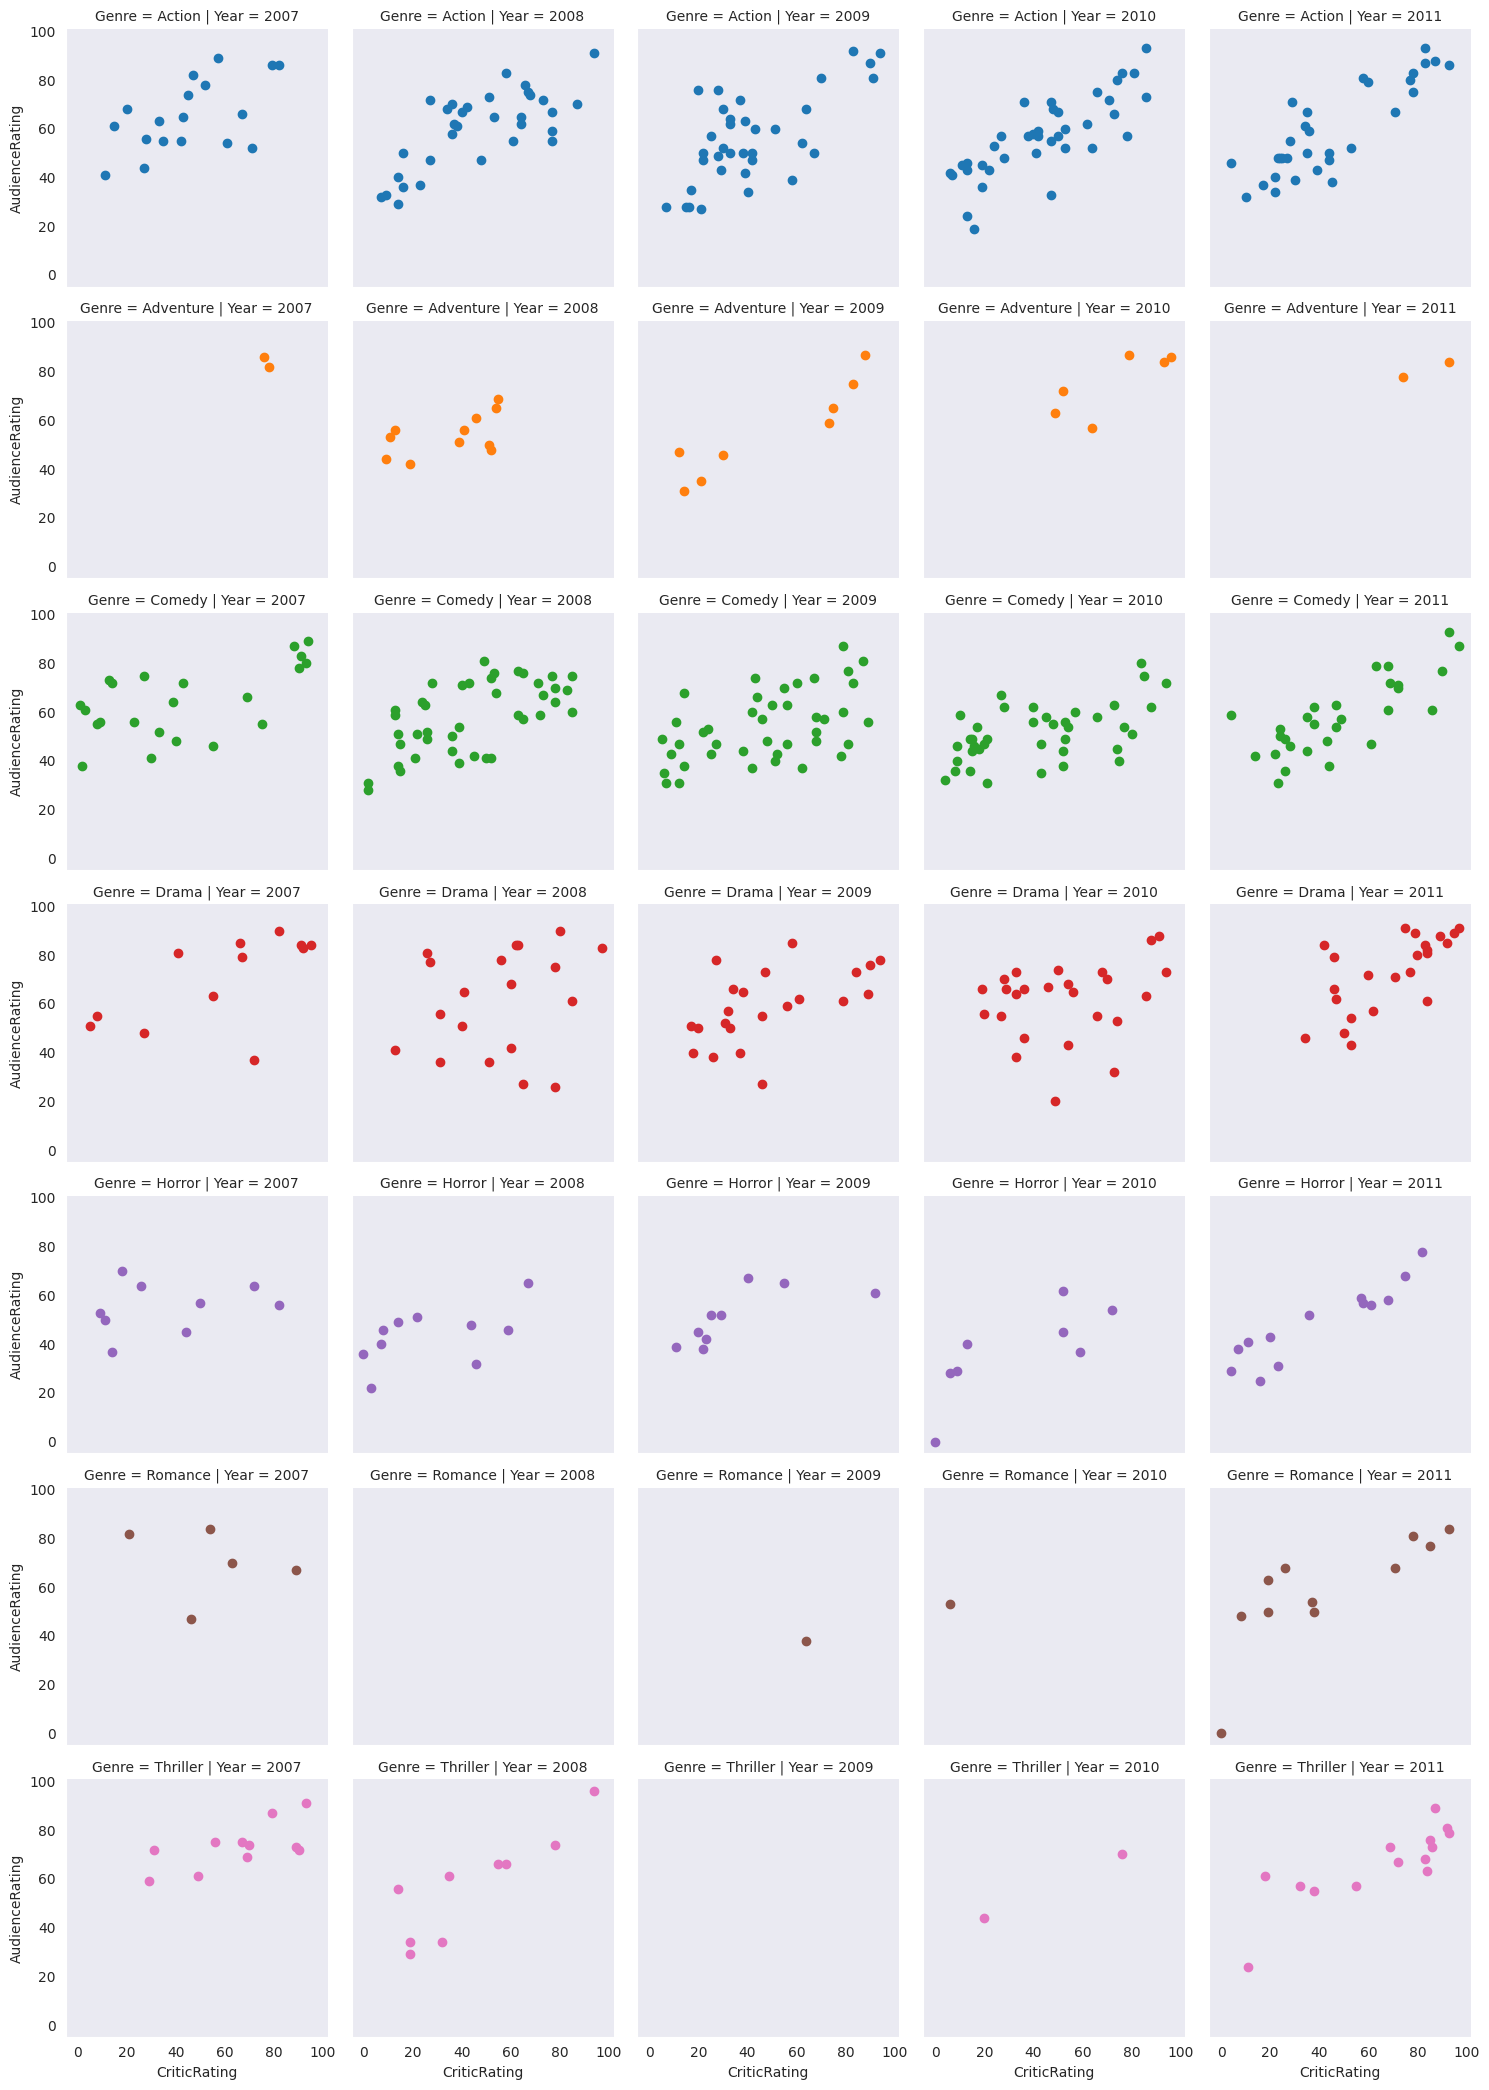

In [36]:
fg1 = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
fg1 = fg1.map(plt.scatter, "CriticRating", "AudienceRating")

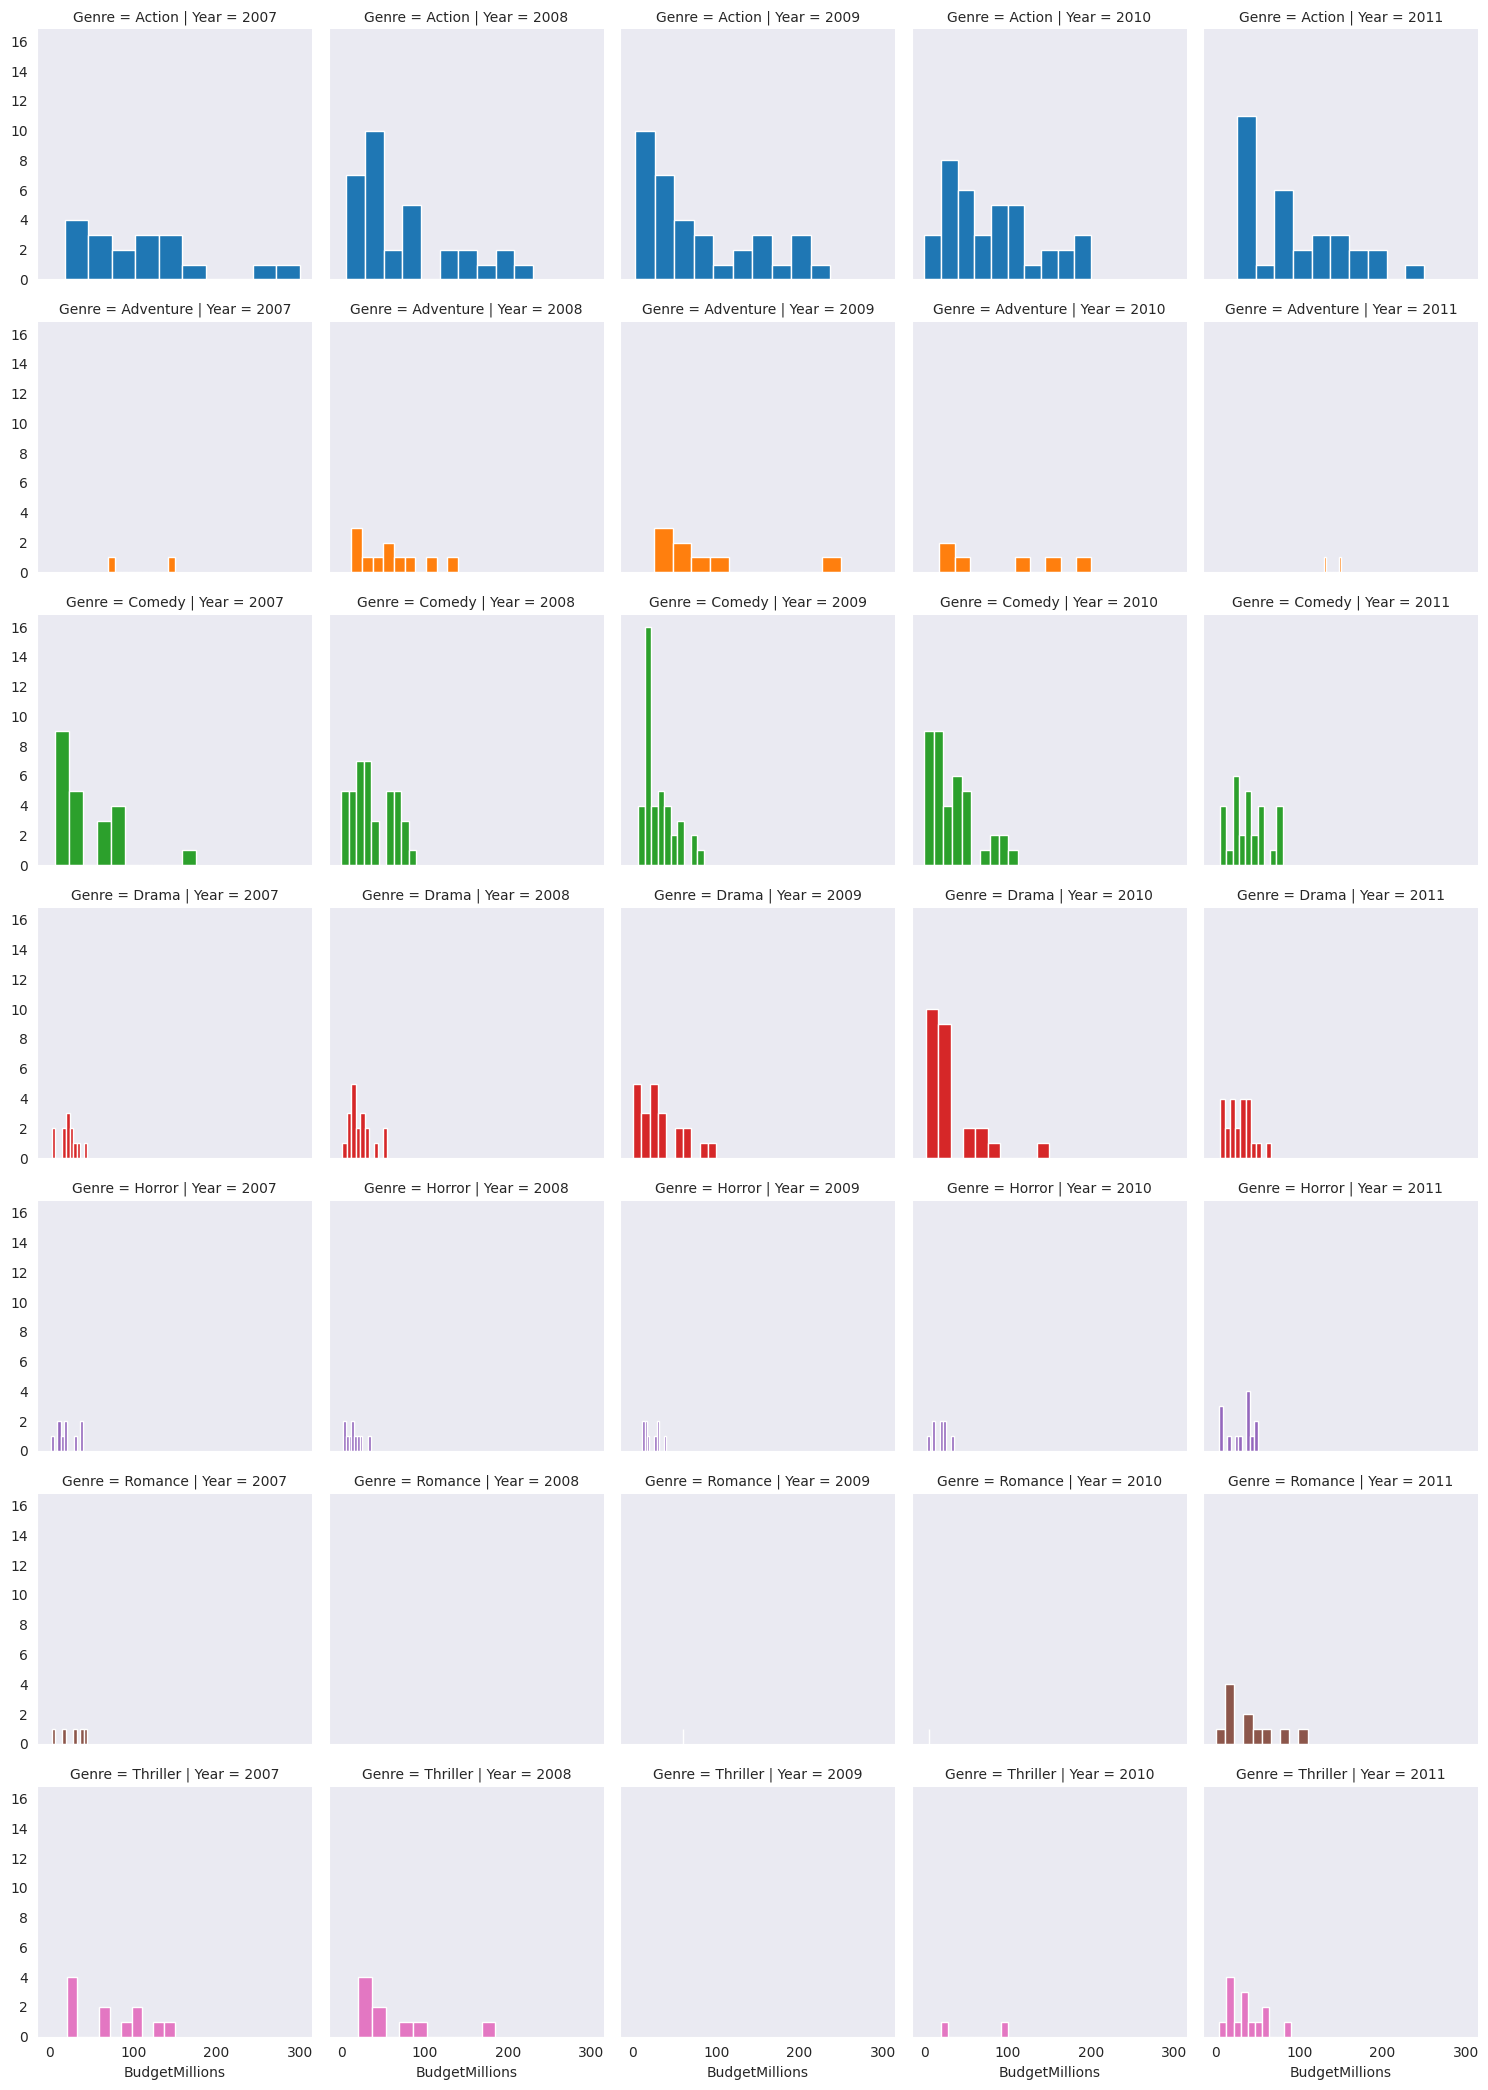

In [37]:
# can populate the facegrid with any type of chart -> example = histograms
fg2 = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
fg2 = fg2.map(plt.hist, "BudgetMillions")

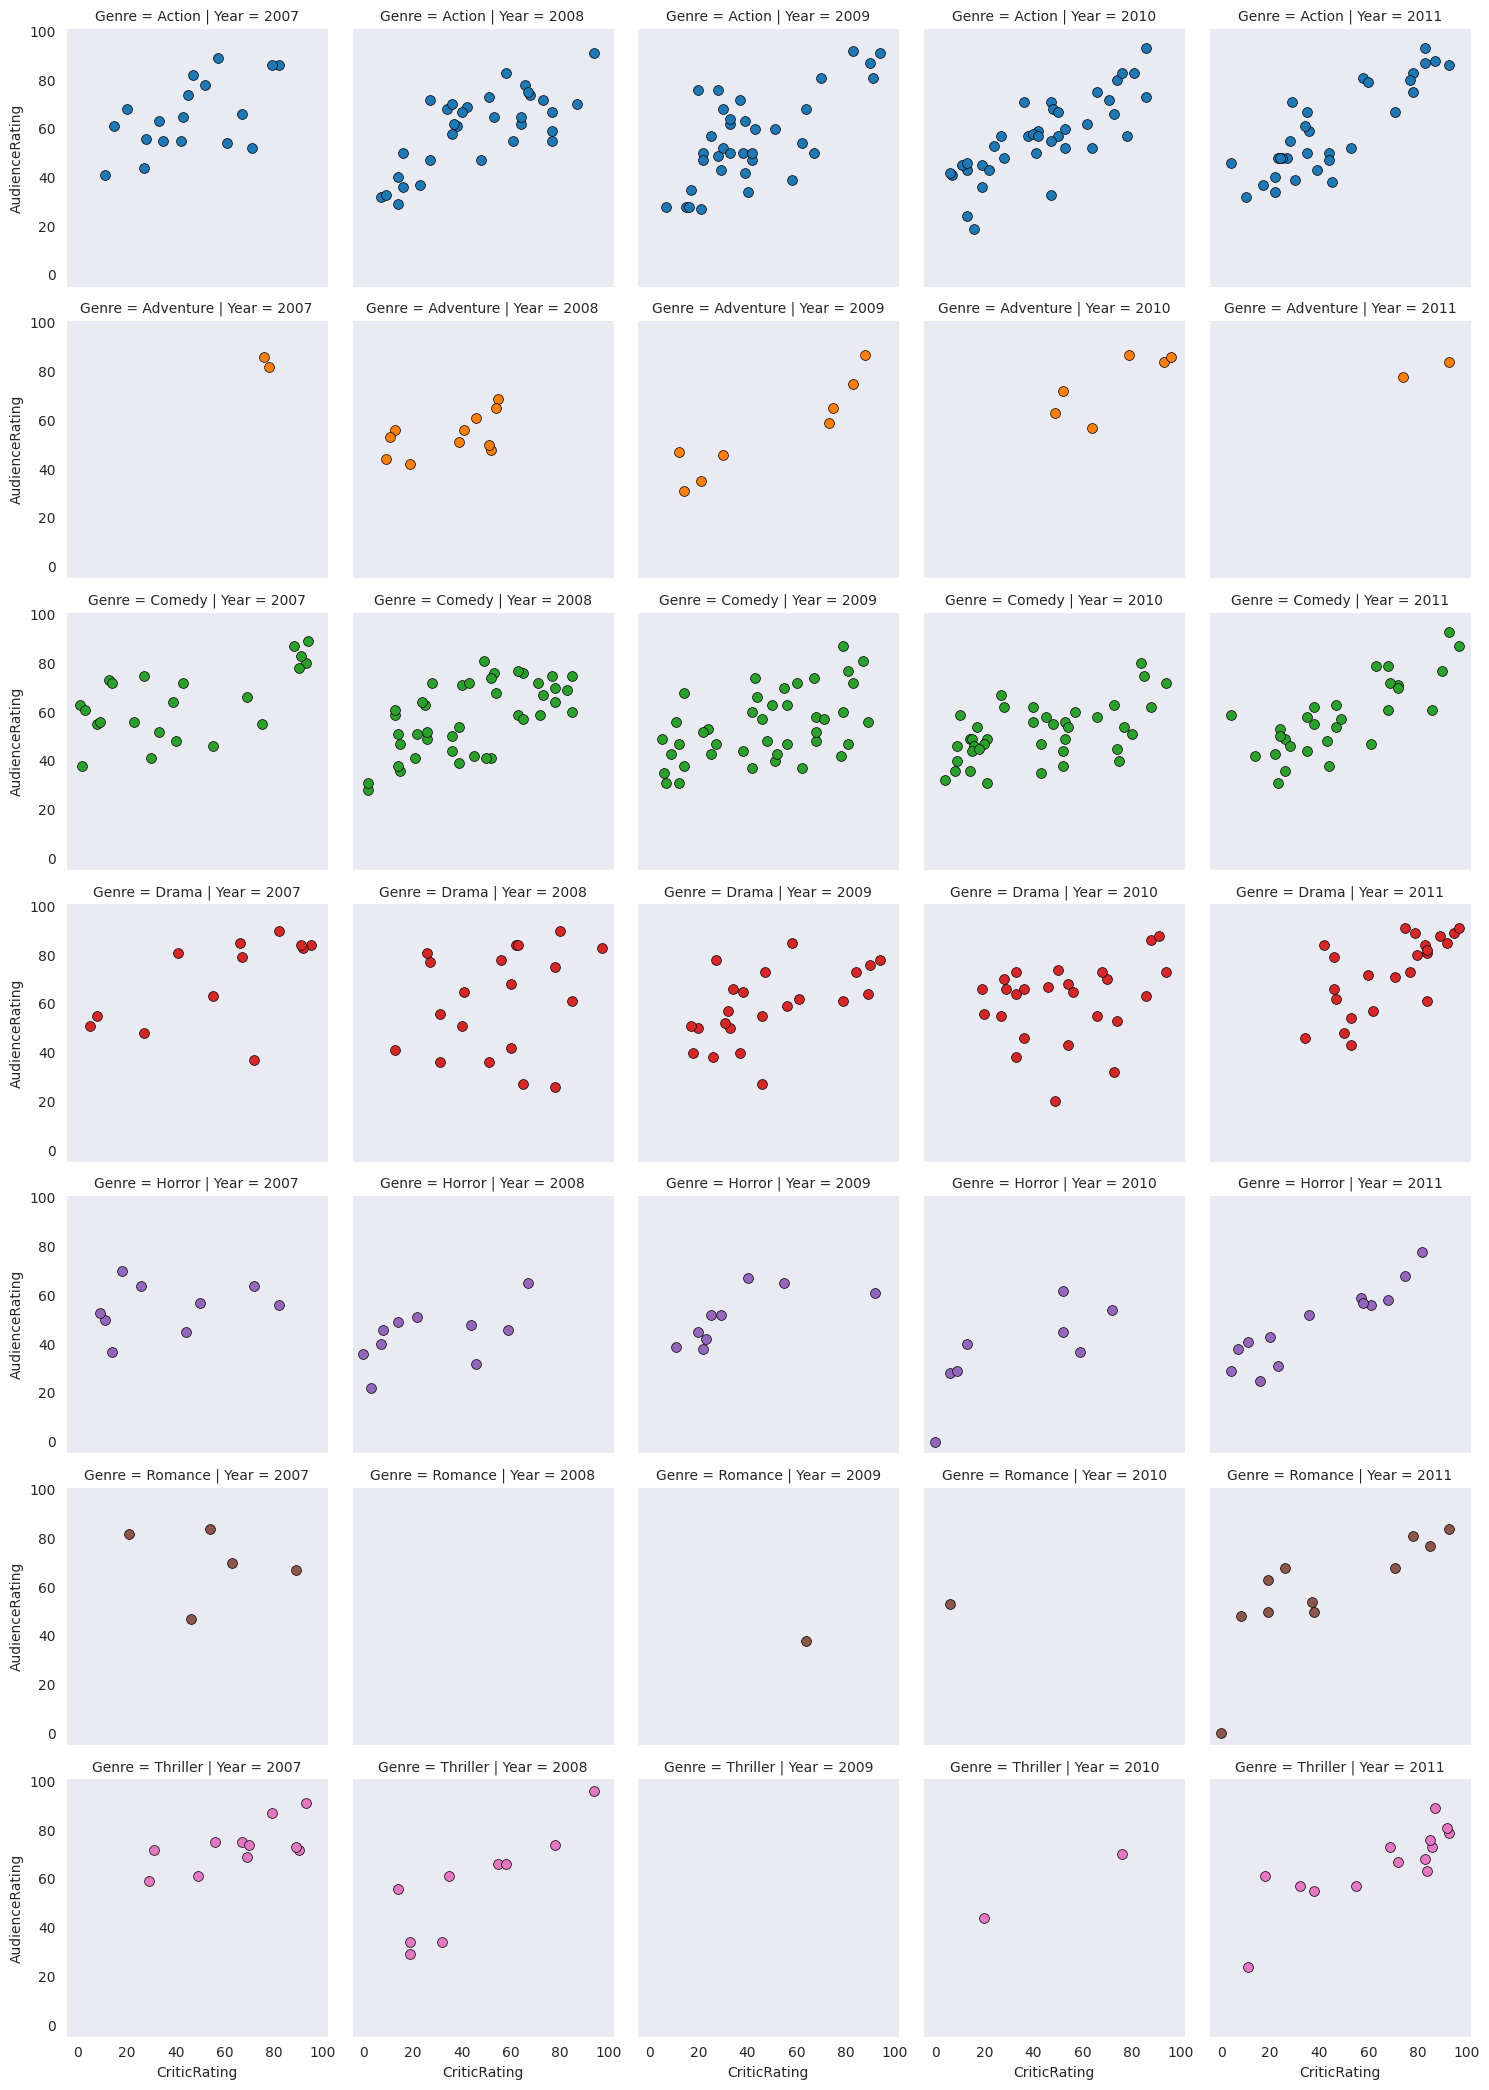

In [38]:
# how does the critic rating x audience rating evolves throughout the years 
fg3 = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor="black")
fg3 = fg3.map(plt.scatter, "CriticRating", "AudienceRating", **kws)

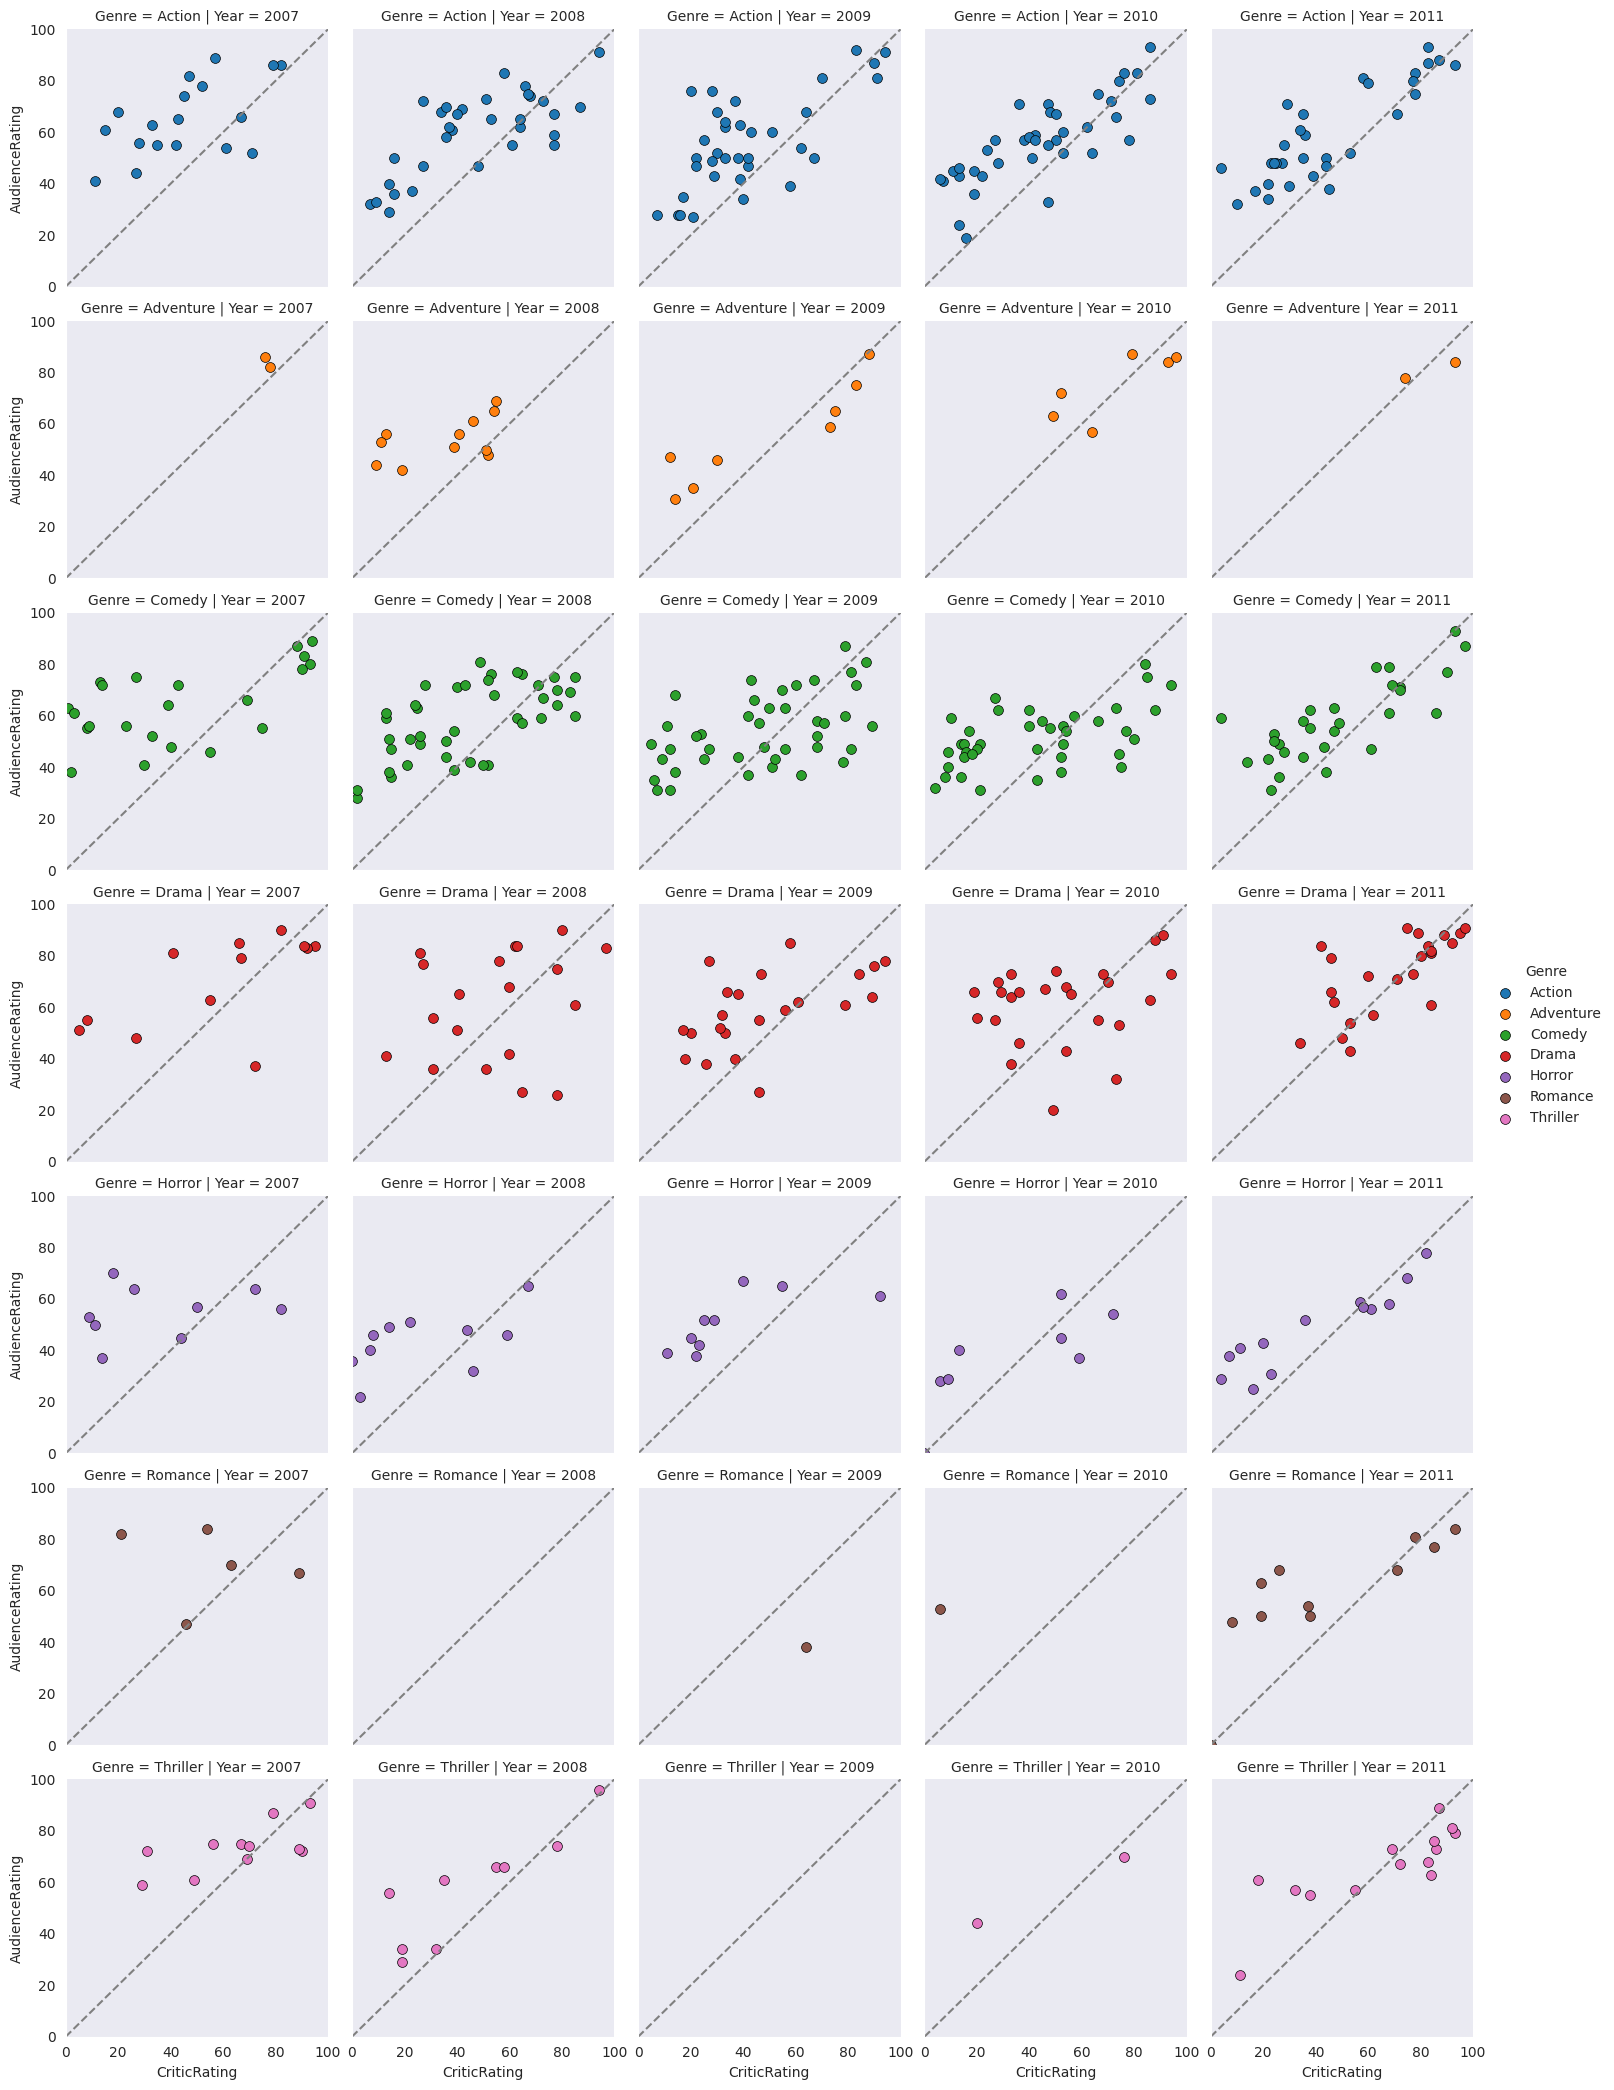

In [39]:
# controlling axes and adding diagonals
fg3 = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor="black")
fg3 = fg3.map(plt.scatter, "CriticRating", "AudienceRating", **kws)
fg3.set(xlim=(0,100), ylim=(0,100))
for ax in fg3.axes.flat: 
    ax.plot((0,100), (0,100), c="gray", ls="--")
    
fg3.add_legend()

-------

# building dashboards

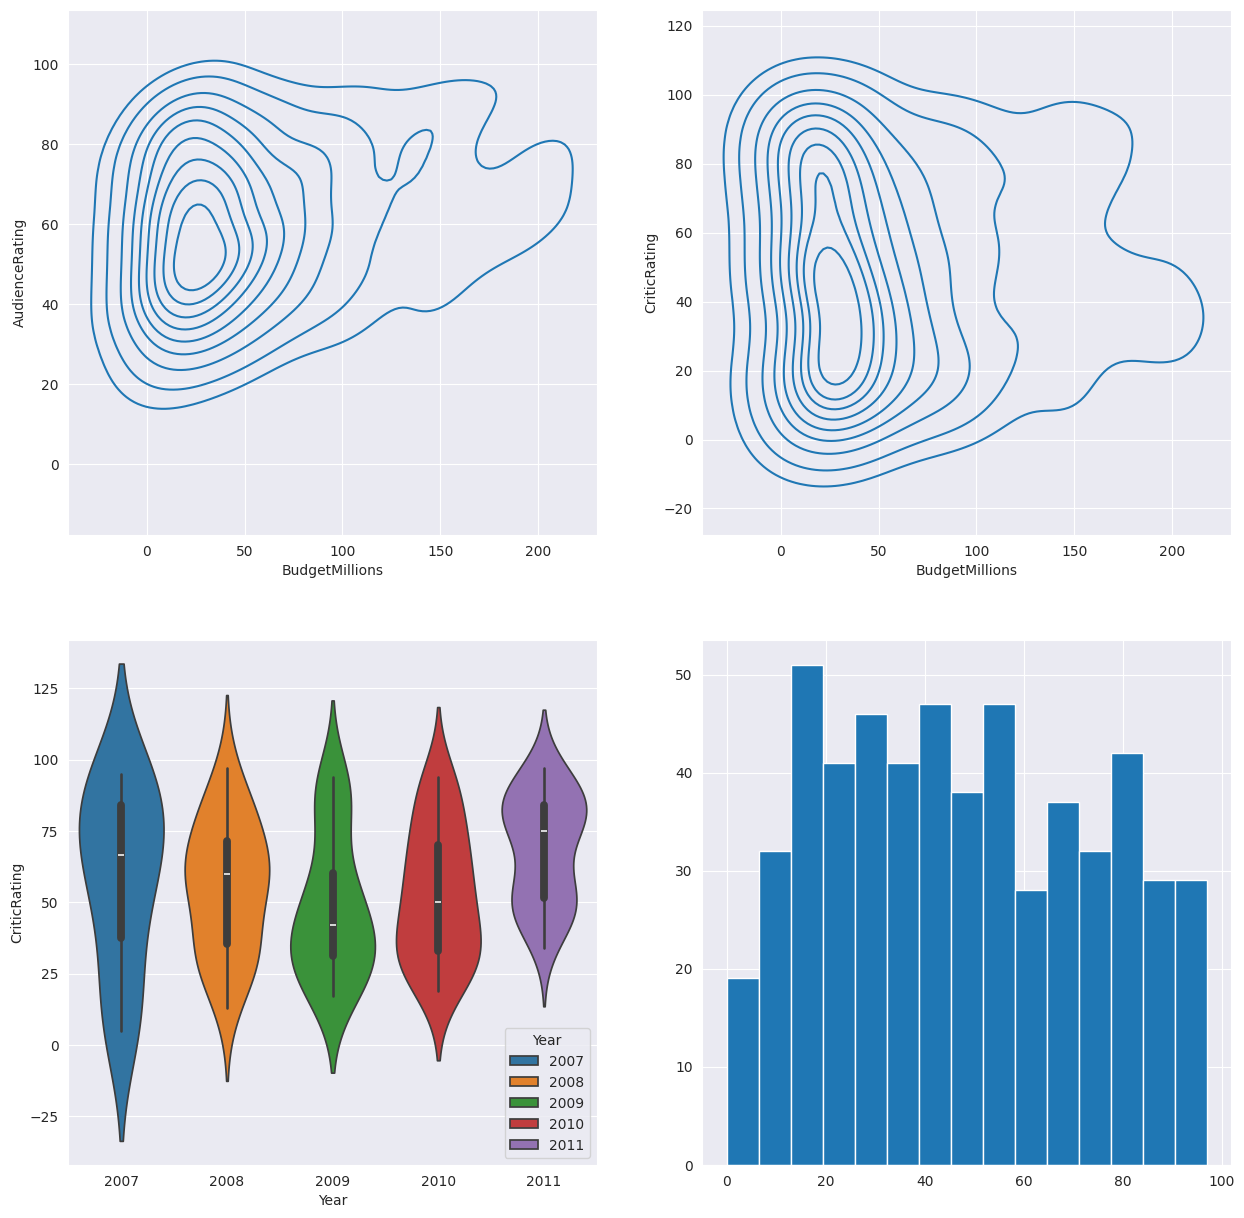

In [40]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15,15))

# standard for seaborn
dash1 = sns.kdeplot(data=movies, x="BudgetMillions", y="AudienceRating", ax=axes[0,0])
dash2 = sns.kdeplot(data=movies, x="BudgetMillions", y="CriticRating", ax=axes[0,1])
dash1.set(xlim=(-40,230))
dash2.set(xlim=(-40,230))
dash3 = sns.violinplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating", hue="Year", ax=axes[1,0])

# standard pyplot approach
axes[1,1].hist(movies.CriticRating, bins=15)
# axes is a pyplot generated object, does not work for seaborn

#dash4 = sns.kdeplot(data=movies, x="CriticRating", y="AudienceRating", shade=True, shade_lowest=False, cmap="Reds", ax=axes[1,1])
# TIP: running this plot together keeps the outline around the edges
#dash5 = sns.kdeplot(data=movies, x="CriticRating", y="AudienceRating", cmap="Reds", ax=axes[1,1])
plt.show()

# styling tips

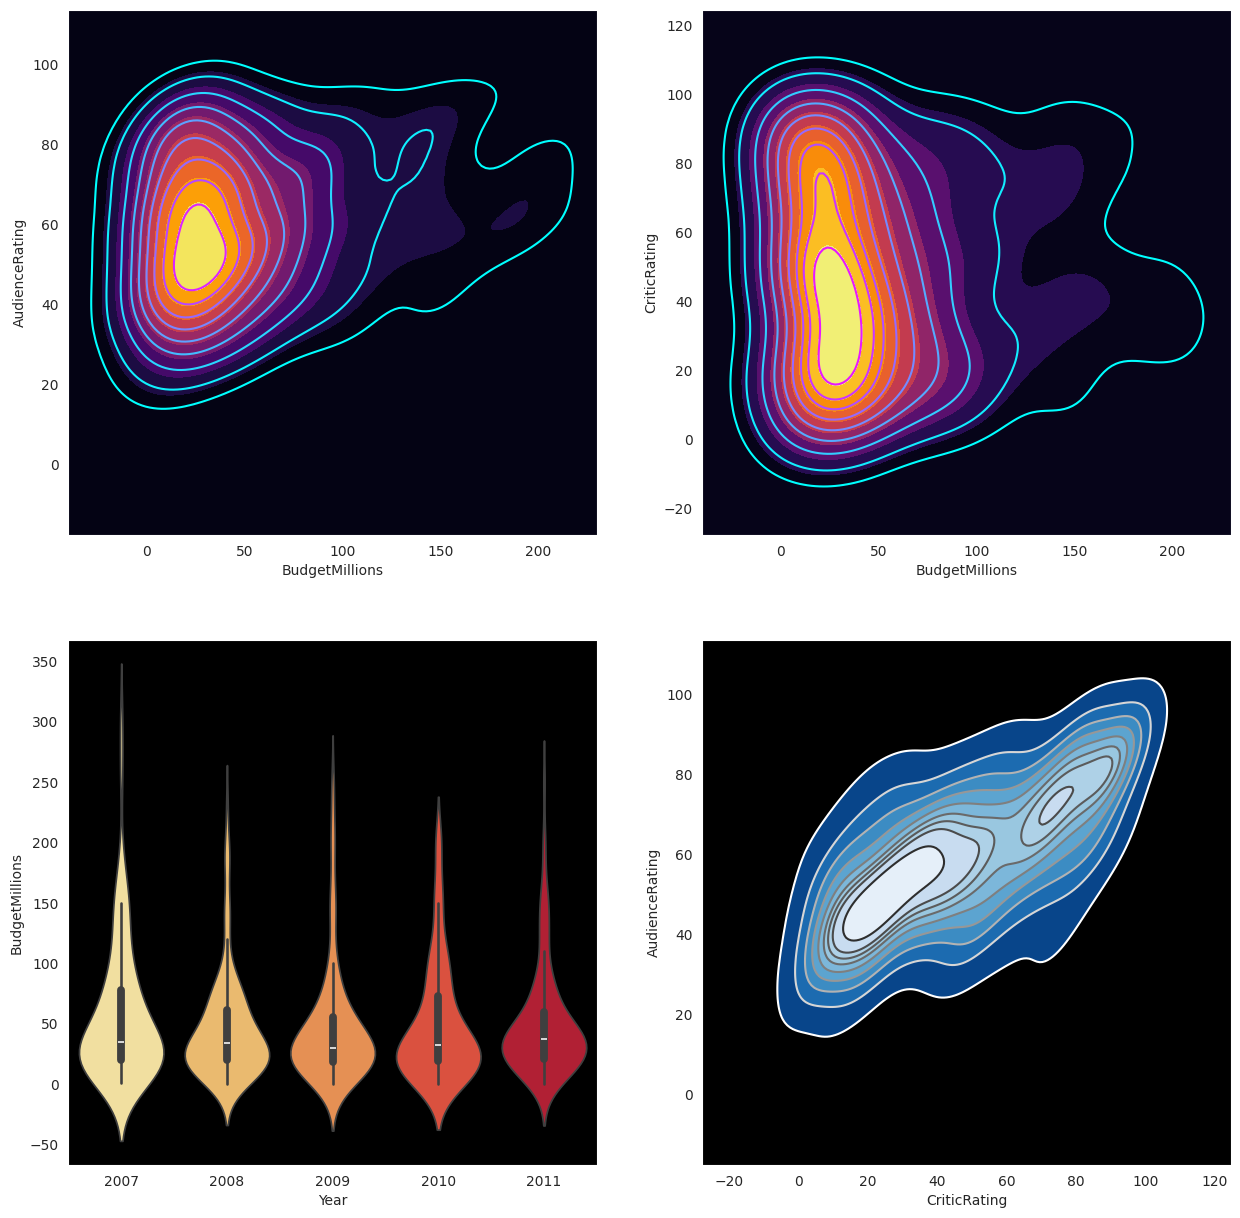

In [41]:
sns.set_style("dark", {"axes.facecolor": "black"})
f, axes = plt.subplots(2, 2, figsize=(15,15))

# plot 0, 0
dash1 = sns.kdeplot(data=movies, x="BudgetMillions", y="AudienceRating", ax=axes[0,0], shade=True, shade_lowest=True, cmap="inferno")
dash1b = sns.kdeplot(data=movies, x="BudgetMillions", y="AudienceRating", ax=axes[0,0], cmap="cool")

#plot 0, 1
dash2 = sns.kdeplot(data=movies, x="BudgetMillions", y="CriticRating", ax=axes[0,1], shade=True, shade_lowest=True, cmap="inferno")
dash2b = sns.kdeplot(data=movies, x="BudgetMillions", y="CriticRating", ax=axes[0,1], cmap="cool")

dash1.set(xlim=(-40,230))
dash2.set(xlim=(-40,230))

# plot 1,0
dash3 = sns.violinplot(data=movies, x="Year", y="BudgetMillions", hue="Year", ax=axes[1,0], legend=False, palette="YlOrRd")


# plot 1,1
dash4 = sns.kdeplot(data=movies, x="CriticRating", y="AudienceRating", shade=True, shade_lowest=False, cmap="Blues_r", ax=axes[1,1])
# TIP: running this plot together keeps the outline around the edges
dash5 = sns.kdeplot(data=movies, x="CriticRating", y="AudienceRating", cmap="gist_gray_r", ax=axes[1,1])
plt.show()

# thematic edits

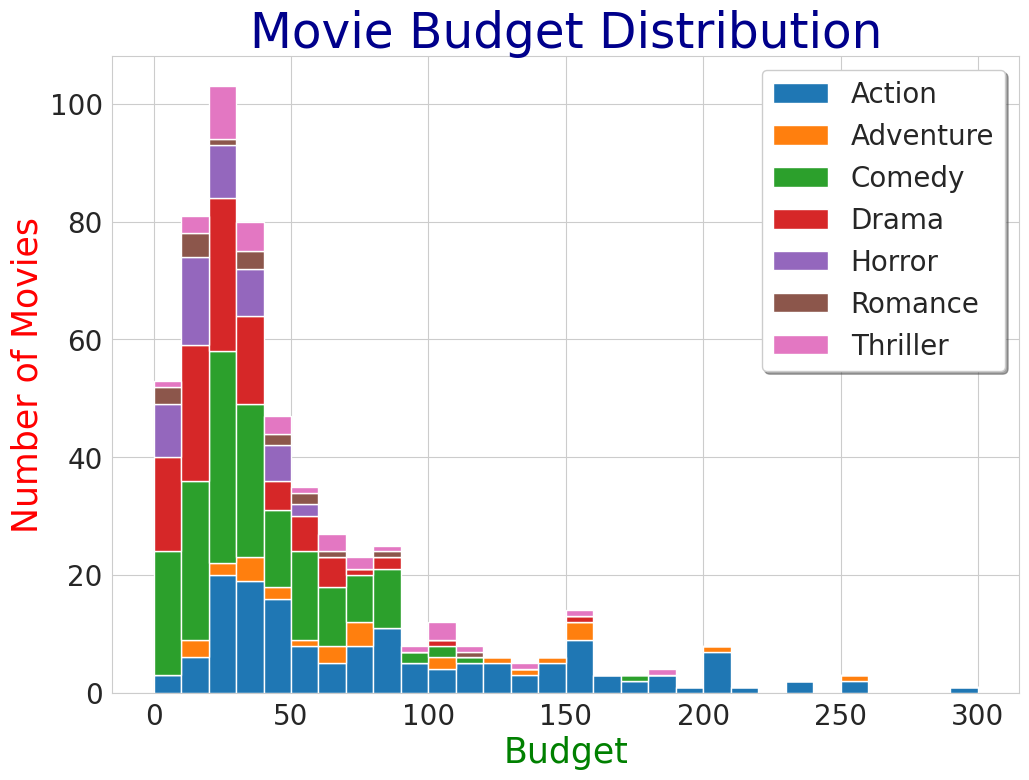

In [42]:
glist = []
labels = []

for g in movies.Genre.cat.categories:
    glist.append(movies[movies.Genre == g].BudgetMillions)
    labels.append(g)
    
sns.set_style("whitegrid")
# create subplot box to easily change the size of the plot
fig, ax = plt.subplots()
# size of A4 paper

fig.set_size_inches(11.7, 8.27)
h5 = plt.hist(glist, bins=30, stacked=True, label=labels)

plt.title("Movie Budget Distribution", fontsize=35, color="DarkBlue")
#fontname="Candara"
plt.ylabel("Number of Movies", fontsize=25, color="Red")
plt.xlabel("Budget", fontsize=25, color="Green")

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, prop={"size":20})
plt.show()